Let's get the data from the Citibike API

In [20]:
import requests
url = 'http://www.citibikenyc.com/stations/json'
data = requests.get(url).json()["stationBeanList"]
data

[{'altitude': '',
  'availableBikes': 4,
  'availableDocks': 33,
  'city': '',
  'id': 72,
  'landMark': '',
  'lastCommunicationTime': '2016-12-01 04:23:09 PM',
  'latitude': 40.76727216,
  'location': '',
  'longitude': -73.99392888,
  'postalCode': '',
  'stAddress1': 'W 52 St & 11 Ave',
  'stAddress2': '',
  'stationName': 'W 52 St & 11 Ave',
  'statusKey': 1,
  'statusValue': 'In Service',
  'testStation': False,
  'totalDocks': 39},
 {'altitude': '',
  'availableBikes': 29,
  'availableDocks': 4,
  'city': '',
  'id': 79,
  'landMark': '',
  'lastCommunicationTime': '2016-12-01 04:22:23 PM',
  'latitude': 40.71911552,
  'location': '',
  'longitude': -74.00666661,
  'postalCode': '',
  'stAddress1': 'Franklin St & W Broadway',
  'stAddress2': '',
  'stationName': 'Franklin St & W Broadway',
  'statusKey': 1,
  'statusValue': 'In Service',
  'testStation': False,
  'totalDocks': 33},
 {'altitude': '',
  'availableBikes': 3,
  'availableDocks': 24,
  'city': '',
  'id': 82,
  'land

And for convenience we put the data in a dataframe:

In [22]:
import pandas
df = pandas.DataFrame(data)
df

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,postalCode,stAddress1,stAddress2,stationName,statusKey,statusValue,testStation,totalDocks
0,,4,33,,72,,2016-12-01 04:23:09 PM,40.767272,,-73.993929,,W 52 St & 11 Ave,,W 52 St & 11 Ave,1,In Service,False,39
1,,29,4,,79,,2016-12-01 04:22:23 PM,40.719116,,-74.006667,,Franklin St & W Broadway,,Franklin St & W Broadway,1,In Service,False,33
2,,3,24,,82,,2016-12-01 04:19:53 PM,40.711174,,-74.000165,,St James Pl & Pearl St,,St James Pl & Pearl St,1,In Service,False,27
3,,7,54,,83,,2016-12-01 04:22:09 PM,40.683826,,-73.976323,,Atlantic Ave & Fort Greene Pl,,Atlantic Ave & Fort Greene Pl,1,In Service,False,62
4,,21,18,,116,,2016-12-01 04:20:21 PM,40.741776,,-74.001497,,W 17 St & 8 Ave,,W 17 St & 8 Ave,1,In Service,False,39
5,,4,15,,119,,2016-12-01 04:23:10 PM,40.696089,,-73.978034,,Park Ave & St Edwards St,,Park Ave & St Edwards St,1,In Service,False,19
6,,3,16,,120,,2016-12-01 04:22:55 PM,40.686768,,-73.959282,,Lexington Ave & Classon Ave,,Lexington Ave & Classon Ave,1,In Service,False,19
7,,30,0,,127,,2016-12-01 04:23:30 PM,40.731724,,-74.006744,,Barrow St & Hudson St,,Barrow St & Hudson St,1,In Service,False,31
8,,27,3,,128,,2016-12-01 04:20:46 PM,40.727103,,-74.002971,,MacDougal St & Prince St,,MacDougal St & Prince St,1,In Service,False,30
9,,0,0,,137,,2016-11-09 05:53:45 PM,40.761628,,-73.972924,,E 56 St & Madison Ave,,E 56 St & Madison Ave,3,Not In Service,False,6


We setup for plotting within the notebook

In [23]:
%matplotlib inline
import matplotlib as plt
import seaborn as sns

# This defines the size of the image below
plt.rcParams['figure.figsize'] = (6, 4)

Let's create first a histogram of available bikes across the stations

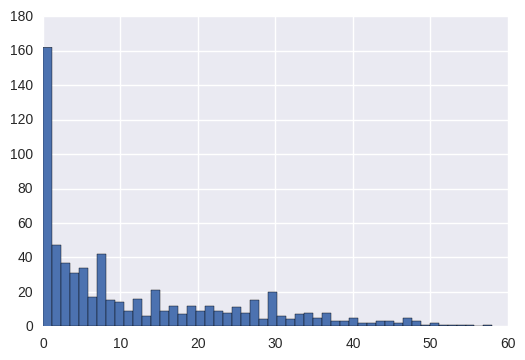

In [25]:
df["availableBikes"].hist(bins=50)

And now let's plot the same, but let's normalize by the size of each station. We will also add a little bit of transparency in the plot using the `alpha` parameter. (Try setting it using different values from 0 to 1.)

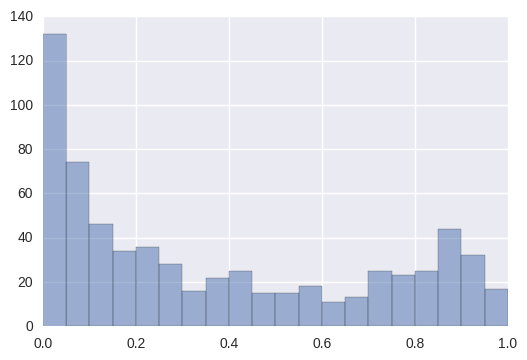

In [28]:
(df["availableBikes"]/df['totalDocks']).hist(alpha=0.5, bins=20)
#df["totalDocks"].hist(alpha=0.5)

And now let's do a plot of available bikes vs total docs in a station:

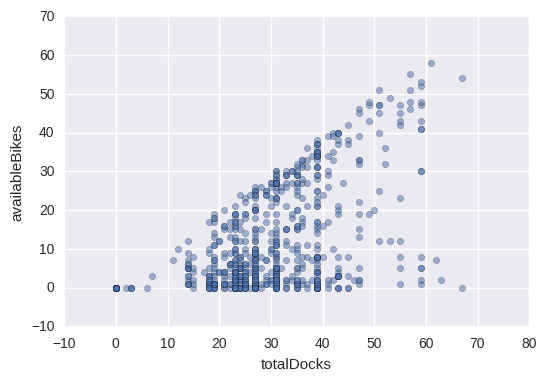

In [29]:
df.plot(kind='scatter', x="totalDocks", y="availableBikes", alpha=0.5)

#### Poor man's mapping

We will now do a small attempt at using a scatterplot, together with the longitude and latitude coordinates to plot things in a map.

In [30]:
# Let's do a first plot. Put the stations on a scatterplot based on
# their longitude and latitude. 
plt.rcParams['figure.figsize'] = (6, 6) # reset the plot to be a square

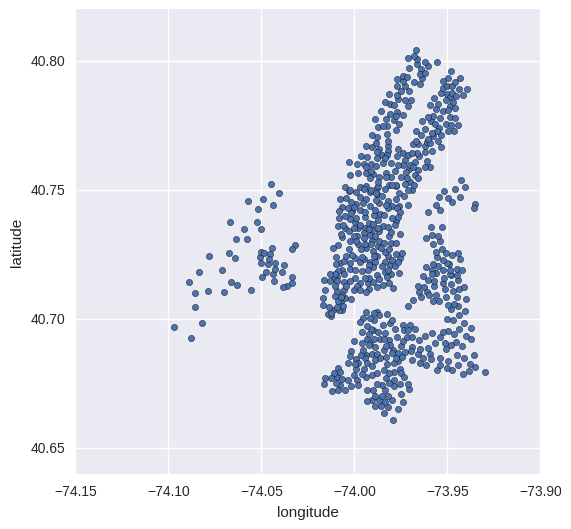

In [31]:
df.plot(kind='scatter', x='longitude', y='latitude')

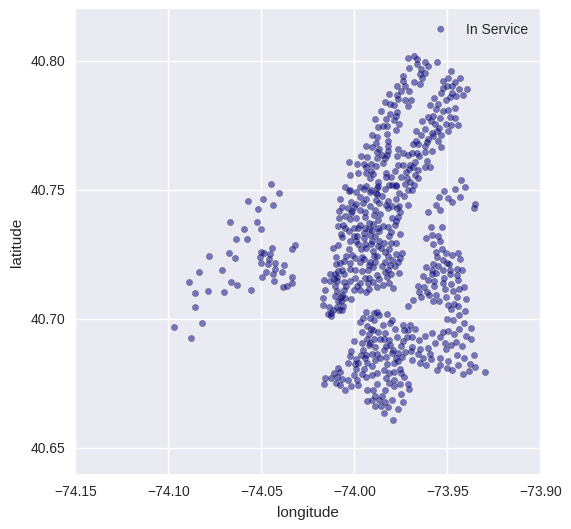

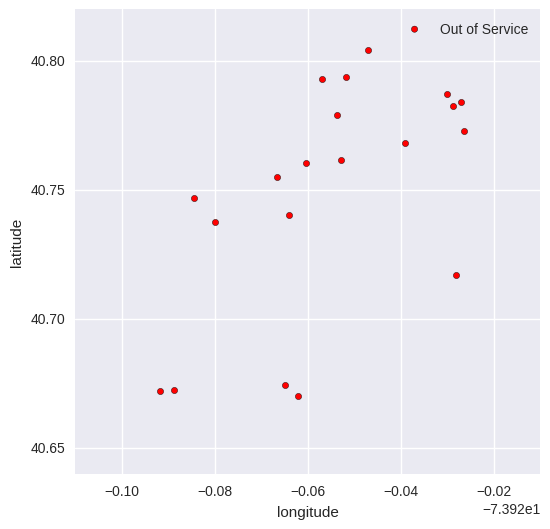

In [34]:
# Lets plot the stations that are out of service in red
inservice = (df["statusValue"] == 'In Service')
outofservice = (df["statusValue"] == 'Not In Service')

df[inservice].plot(kind='scatter', 
                   x='longitude', 
                   y='latitude', 
                   color='DarkBlue', alpha=0.5,
                   label='In Service')

df[outofservice].plot(kind='scatter', 
                      x='longitude', 
                      y='latitude', 
                      color='Red', 
                      label = 'Out of Service')

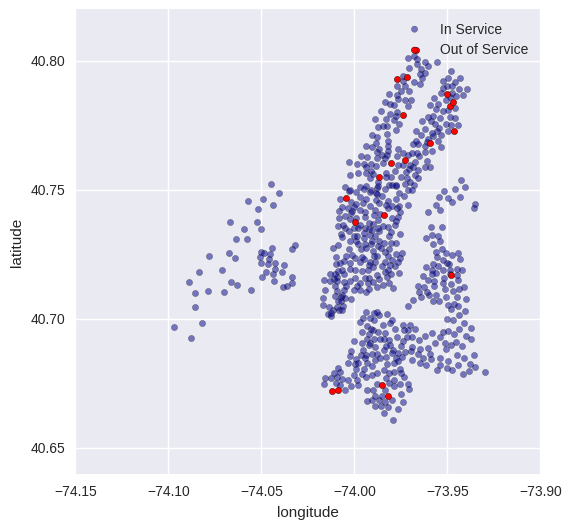

In [36]:
# I do not like having to separate plots for that. There should be a way to merge the two plots
# After checking the online documentation, it seem that we will use the "ax" convention
inservice = (df["statusValue"] == 'In Service')
outofservice = (df["statusValue"] == 'Not In Service')

firstplot = df[inservice].plot(kind='scatter', 
                               x='longitude', 
                               y='latitude', 
                               color='DarkBlue', alpha=0.5,
                               label='In Service')

secondplot = df[outofservice].plot(kind='scatter', 
                      x='longitude', 
                      y='latitude', 
                      color='Red', 
                      label = 'Out of Service', 
                      ax = firstplot)


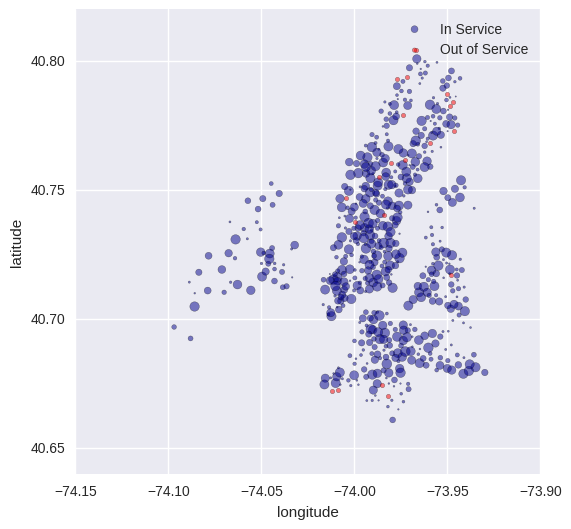

In [40]:
# And now make the size of each point proportional to the size of available bikes
# using the s option in the plot
inservice = (df["statusValue"] == 'In Service')
outofservice = (df["statusValue"] == 'Not In Service')

# We also add the "alpha=0.5" to add transparency
firstplot = df[inservice].plot(kind='scatter', 
                               x='longitude', 
                               y='latitude', 
                               color='DarkBlue', 
                               alpha=0.5, 
                               label='In Service', 
                               s=50*(df['availableBikes']/df['totalDocks']))

secondplot = df[outofservice].plot(kind='scatter', 
                                   x='longitude', 
                                   y='latitude', 
                                   color='Red', 
                                   ax = firstplot, 
                                   s = 10, alpha = 0.5,
                                   label = 'Out of Service')


,abstract,byline,column,count_type,des_facet,geo_facet,media,org_facet,per_facet,published_date,section,source,title,url
0,The auction house has become entangled in a di...,By GRAHAM BOWLEY and WILLIAM K. RASHBAUM,,EMAILED,"[ART, AUCTIONS, APPRAISALS AND VALUATION (PROP...",,"[{'caption': '“Salvator Mundi,” a depiction of...",[SOTHEBY'S],"[RYBOLOVLEV, DMITRY EVGENEVICH, BOUVIER, YVES,...",2016-11-28,Arts,The New York Times,Sotheby’s Tries to Block Suit Over a Leonardo ...,http://www.nytimes.com/2016/11/28/arts/design/...
1,What you need to know about Kaija Saariaho’s o...,By ZACHARY WOOLFE,,EMAILED,[OPERA],,"[{'caption': 'Kaija Saariaho, composer of “L’A...",[METROPOLITAN OPERA],"[SAARIAHO, KAIJA, MALKKI, SUSANNA, LEPAGE, ROB...",2016-11-25,Arts,The New York Times,Your Guide to a Met Opera Milestone,http://www.nytimes.com/2016/11/25/arts/music/y...
2,The photographer Sylvain Couzinet-Jacques move...,By TED LOOS,,EMAILED,"[ART, PHOTOGRAPHY]",[EDEN (NC)],[{'caption': 'The French artist Sylvain Couzin...,[APERTURE FOUNDATION],"[COUZINET-JACQUES, SYLVAIN]",2016-11-25,Arts,The New York Times,How a French Artist Turned a Stay in North Car...,http://www.nytimes.com/2016/11/25/arts/design/...
3,Ms. Oliveros also addressed the theme of gende...,By STEVE SMITH,,EMAILED,"[MUSIC, DEATHS (OBITUARIES)]",,[{'caption': 'Pauline Oliveros in 2015. Taking...,[DEEP LISTENING BAND],"[OLIVEROS, PAULINE]",2016-11-27,Arts,The New York Times,"Pauline Oliveros, Composer Who Championed ‘Dee...",http://www.nytimes.com/2016/11/27/arts/music/p...
4,Peter Sellars on his Reagan-era staging of “Le...,By MICHAEL COOPER,,EMAILED,[OPERA],,"[{'caption': 'Peter Sellars in Hamburg, German...","[TRUMP TOWER (MANHATTAN, NY)]","[SELLARS, PETER, MOZART, WOLFGANG AMADEUS, TRU...",2016-11-25,Arts,The New York Times,Remember When ‘Figaro’ Was Set in Trump Tower?,http://www.nytimes.com/2016/11/25/arts/music/r...
5,Both Gagosian and Rech will handle Wesselmann’...,By ROBIN POGREBIN,,EMAILED,[ART],,[{'caption': 'Tom Wesselmann&rsquo;s &ldquo;Ba...,"[ALMINE RECH GALLERY (MANHATTAN, NY), GAGOSIAN...","[LEVY, DOMINIQUE, WESSELMANN, TOM, LEE SEUNG-T...",2016-11-24,Arts,The New York Times,Pop Artist Tom Wesselmann’s Estate Will Be Rep...,http://www.nytimes.com/2016/11/24/arts/design/...
6,This Netflix mini-series returns viewers to th...,By JAMES PONIEWOZIK,,EMAILED,"[WEB-ORIGINAL PROGRAMMING, TELEVISION]",,"[{'caption': 'Lauren Graham, left, and Alexis ...",[NETFLIX INC],"[GRAHAM, LAUREN, BLEDEL, ALEXIS, SHERMAN-PALLA...",2016-11-23,Arts,The New York Times,Review: ‘Gilmore Girls: A Year in the Life’ Re...,http://www.nytimes.com/2016/11/23/arts/televis...
7,"Music can’t fix everything, but it can help.",By ZACHARY WOOLFE,,EMAILED,[CLASSICAL MUSIC],,[{'caption': 'Tuning in to — or out of — the h...,,,2016-11-21,Arts,The New York Times,The 12 Classical Pieces Times Editors Recommen...,http://www.nytimes.com/2016/11/21/arts/music/t...
8,A music producer and arranger who founded Cher...,By DANIEL E. SLOTNIK,,EMAILED,,,"[{'caption': 'John Denver, left, and Milt Okun...",,"[OKUN, MILTON T (1923-2016), OKUN, MILTON T]",2016-11-20,Arts,The New York Times,"Milt Okun, Who Turned John Denver Into a Pop S...",http://www.nytimes.com/2016/11/21/arts/music/m...
9,The former “Late Show” host on the liberation ...,By DAVE ITZKOFF,,EMAILED,[TELEVISION],,"[{'caption': '', 'type': 'image', 'copyright':...",[NATIONAL GEOGRAPHIC CHANNEL],"[LETTERMAN, DAVID]",2016-10-18,Arts,The New York Times,David Letterman (and His Beard) Shop at Target...,http://www.nytimes.com/2016/10/23/arts/televis...


,abstract,byline,column,count_type,des_facet,geo_facet,media,org_facet,per_facet,published_date,section,source,title,url
0,The auction house has become entangled in a di...,By GRAHAM BOWLEY and WILLIAM K. RASHBAUM,,EMAILED,"[ART, AUCTIONS, APPRAISALS AND VALUATION (PROP...",,"[{'caption': '“Salvator Mundi,” a depiction of...",[SOTHEBY'S],"[RYBOLOVLEV, DMITRY EVGENEVICH, BOUVIER, YVES,...",2016-11-28,Arts,The New York Times,Sotheby’s Tries to Block Suit Over a Leonardo ...,http://www.nytimes.com/2016/11/28/arts/design/...
1,What you need to know about Kaija Saariaho’s o...,By ZACHARY WOOLFE,,EMAILED,[OPERA],,"[{'caption': 'Kaija Saariaho, composer of “L’A...",[METROPOLITAN OPERA],"[SAARIAHO, KAIJA, MALKKI, SUSANNA, LEPAGE, ROB...",2016-11-25,Arts,The New York Times,Your Guide to a Met Opera Milestone,http://www.nytimes.com/2016/11/25/arts/music/y...
2,The photographer Sylvain Couzinet-Jacques move...,By TED LOOS,,EMAILED,"[ART, PHOTOGRAPHY]",[EDEN (NC)],[{'caption': 'The French artist Sylvain Couzin...,[APERTURE FOUNDATION],"[COUZINET-JACQUES, SYLVAIN]",2016-11-25,Arts,The New York Times,How a French Artist Turned a Stay in North Car...,http://www.nytimes.com/2016/11/25/arts/design/...
3,Ms. Oliveros also addressed the theme of gende...,By STEVE SMITH,,EMAILED,"[MUSIC, DEATHS (OBITUARIES)]",,[{'caption': 'Pauline Oliveros in 2015. Taking...,[DEEP LISTENING BAND],"[OLIVEROS, PAULINE]",2016-11-27,Arts,The New York Times,"Pauline Oliveros, Composer Who Championed ‘Dee...",http://www.nytimes.com/2016/11/27/arts/music/p...
4,Peter Sellars on his Reagan-era staging of “Le...,By MICHAEL COOPER,,EMAILED,[OPERA],,"[{'caption': 'Peter Sellars in Hamburg, German...","[TRUMP TOWER (MANHATTAN, NY)]","[SELLARS, PETER, MOZART, WOLFGANG AMADEUS, TRU...",2016-11-25,Arts,The New York Times,Remember When ‘Figaro’ Was Set in Trump Tower?,http://www.nytimes.com/2016/11/25/arts/music/r...
5,Both Gagosian and Rech will handle Wesselmann’...,By ROBIN POGREBIN,,EMAILED,[ART],,[{'caption': 'Tom Wesselmann&rsquo;s &ldquo;Ba...,"[ALMINE RECH GALLERY (MANHATTAN, NY), GAGOSIAN...","[LEVY, DOMINIQUE, WESSELMANN, TOM, LEE SEUNG-T...",2016-11-24,Arts,The New York Times,Pop Artist Tom Wesselmann’s Estate Will Be Rep...,http://www.nytimes.com/2016/11/24/arts/design/...
6,This Netflix mini-series returns viewers to th...,By JAMES PONIEWOZIK,,EMAILED,"[WEB-ORIGINAL PROGRAMMING, TELEVISION]",,"[{'caption': 'Lauren Graham, left, and Alexis ...",[NETFLIX INC],"[GRAHAM, LAUREN, BLEDEL, ALEXIS, SHERMAN-PALLA...",2016-11-23,Arts,The New York Times,Review: ‘Gilmore Girls: A Year in the Life’ Re...,http://www.nytimes.com/2016/11/23/arts/televis...
7,"Music can’t fix everything, but it can help.",By ZACHARY WOOLFE,,EMAILED,[CLASSICAL MUSIC],,[{'caption': 'Tuning in to — or out of — the h...,,,2016-11-21,Arts,The New York Times,The 12 Classical Pieces Times Editors Recommen...,http://www.nytimes.com/2016/11/21/arts/music/t...
8,A music producer and arranger who founded Cher...,By DANIEL E. SLOTNIK,,EMAILED,,,"[{'caption': 'John Denver, left, and Milt Okun...",,"[OKUN, MILTON T (1923-2016), OKUN, MILTON T]",2016-11-20,Arts,The New York Times,"Milt Okun, Who Turned John Denver Into a Pop S...",http://www.nytimes.com/2016/11/21/arts/music/m...
9,The former “Late Show” host on the liberation ...,By DAVE ITZKOFF,,EMAILED,[TELEVISION],,"[{'caption': '', 'type': 'image', 'copyright':...",[NATIONAL GEOGRAPHIC CHANNEL],"[LETTERMAN, DAVID]",2016-10-18,Arts,The New York Times,David Letterman (and His Beard) Shop at Target...,http://www.nytimes.com/2016/10/23/arts/televis...
